In [1]:
import folium
import pandas as pd
import numpy as np
import geopandas as gpd
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

import networkx as nx



In [2]:
%%time


# Load & Read GeoJSON file

# file_path = "/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/physical_grid_data/US_Electric_Power_Transmission_Lines_-3845977064911730921.geojson"
# gdf = gpd.read_file(file_path)
# # gdf = gdf.to_crs(epsg=3857)
# gdf = gdf.to_crs(epsg=4326)
 

# # Convert timeframes to folium-friendly types
# gdf['SOURCEDATE'] = pd.to_datetime(gdf['SOURCEDATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
# gdf['VAL_DATE'] = pd.to_datetime(gdf['VAL_DATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')


file_path = "/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/physical_grid_data/U.S._Electric_Power_Transmission_Lines.geojson"
gdf = gpd.read_file(file_path)
# gdf = gdf.to_crs(epsg=3857)
# gdf = gdf.to_crs(epsg=4326)

 

# Convert timeframes to folium-friendly types
gdf['SOURCEDATE'] = pd.to_datetime(gdf['SOURCEDATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
gdf['VAL_DATE'] = pd.to_datetime(gdf['VAL_DATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')




CPU times: user 30.3 s, sys: 398 ms, total: 30.7 s
Wall time: 32.1 s


In [3]:
gdf

FID  OBJECTID      ID          TYPE      STATUS NAICS_CODE  \
0          1       501  135919  AC; OVERHEAD  IN SERVICE     221121   
1          2       502  141425  AC; OVERHEAD  IN SERVICE     221121   
2          3       503  141426  AC; OVERHEAD  IN SERVICE     221121   
3          4       504  141429  AC; OVERHEAD  IN SERVICE     221121   
4          5       505  141422  AC; OVERHEAD  IN SERVICE     221121   
...      ...       ...     ...           ...         ...        ...   
93042  93043     93043  315082  AC; OVERHEAD  IN SERVICE     221121   
93043  93044     93044  315083  AC; OVERHEAD  IN SERVICE     221121   
93044  93045     93045  315084  AC; OVERHEAD  IN SERVICE     221121   
93045  93046     93046  315085  AC; OVERHEAD  IN SERVICE     221121   
93046  93047     93047  315086  AC; OVERHEAD  IN SERVICE     221121   

                                         NAICS_DESC  \
0      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
1      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
2      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
3      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
4      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
...                                             ...   
93042  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93043  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93044  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93045  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93046  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   

                                                  SOURCE           SOURCEDATE  \
0                                       IMAGERY, EIA 860  2014-08-04T00:00:00   
1                                       IMAGERY, EIA 861  2014-04-07T00:00:00   
2                                                IMAGERY  2014-07-15T00:00:00   
3      IMAGERY, OpenStreetMap, http://www.oatioasis.c...  2014-07-08T00:00:00   
4                              IMAGERY, EIA 861, EIA 860  2015-05-28T00:00:00   
...                                                  ...                  ...   
93042  Western Electricity Coordinating Council https...  2017-01-01T00:00:00   
93043                             IMAGERY, OpenStreetMap  2019-11-23T00:00:00   
93044                             IMAGERY, OpenStreetMap  2019-11-23T00:00:00   
93045                             IMAGERY, OpenStreetMap  2019-11-23T00:00:00   
93046  http://www.newmexicocare.org/images/maps/nm_tr...  2019-03-08T00:00:00   

          VAL_METHOD  ...                       OWNER VOLTAGE  VOLT_CLASS  \
0            IMAGERY  ...               NOT AVAILABLE    69.0   UNDER 100   
1            IMAGERY  ...            ALABAMA POWER CO   115.0     100-161   
2            IMAGERY  ...  DUKE ENERGY CAROLINAS, LLC   100.0     100-161   
3            IMAGERY  ...  TENNESSEE VALLEY AUTHORITY   161.0     100-161   
4            IMAGERY  ...      COMMONWEALTH EDISON CO   138.0     100-161   
...              ...  ...                         ...     ...         ...   
93042  IMAGERY/OTHER  ...               NOT AVAILABLE   230.0     220-287   
93043        IMAGERY  ...         ENTERGY TEXAS, INC.   138.0     100-161   
93044        IMAGERY  ...         ENTERGY TEXAS, INC.   138.0     100-161   
93045        IMAGERY  ...         ENTERGY TEXAS, INC.   138.0     100-161   
93046  IMAGERY/OTHER  ...                         CEC    69.0   UNDER 100   

      INFERRED               SUB_1         SUB_2    SHAPE__Len  \
0            Y       UNKNOWN115865     TAP142941     29.188701   
1            Y       UNKNOWN109093     TAP142857     74.705018   
2            Y       UNKNOWN115051     TAP154872     70.223774   
3            N  FORT PAYNE PRIMARY     TAP152965  12929.295887   
4            Y       UNKNOWN121903     TAP137923   1737.440378   
...        ...                 ...           ...           ...   
93042        N           TAP317033    LONE BUTTE   3437.236752   
93043        Y           TAP316626     TAP316629   3287.127256   
930

In [217]:
# Drop columns with 'NOT AVAILABLE' as substation value
# gdf[ (gdf['SUB_1']=='NOT AVAILABLE') | (gdf['SUB_2']=='NOT AVAILABLE')]
condition = ( (gdf['SUB_1']=='NOT AVAILABLE') | (gdf['SUB_2']=='NOT AVAILABLE') )
gdf = gdf[~condition]
gdf

FID  OBJECTID      ID          TYPE      STATUS NAICS_CODE  \
0          1       501  135919  AC; OVERHEAD  IN SERVICE     221121   
1          2       502  141425  AC; OVERHEAD  IN SERVICE     221121   
2          3       503  141426  AC; OVERHEAD  IN SERVICE     221121   
3          4       504  141429  AC; OVERHEAD  IN SERVICE     221121   
4          5       505  141422  AC; OVERHEAD  IN SERVICE     221121   
...      ...       ...     ...           ...         ...        ...   
93042  93043     93043  315082  AC; OVERHEAD  IN SERVICE     221121   
93043  93044     93044  315083  AC; OVERHEAD  IN SERVICE     221121   
93044  93045     93045  315084  AC; OVERHEAD  IN SERVICE     221121   
93045  93046     93046  315085  AC; OVERHEAD  IN SERVICE     221121   
93046  93047     93047  315086  AC; OVERHEAD  IN SERVICE     221121   

                                         NAICS_DESC  \
0      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
1      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
2      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
3      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
4      ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
...                                             ...   
93042  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93043  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93044  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93045  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   
93046  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   

                                                  SOURCE           SOURCEDATE  \
0                                       IMAGERY, EIA 860  2014-08-04T00:00:00   
1                                       IMAGERY, EIA 861  2014-04-07T00:00:00   
2                                                IMAGERY  2014-07-15T00:00:00   
3      IMAGERY, OpenStreetMap, http://www.oatioasis.c...  2014-07-08T00:00:00   
4                              IMAGERY, EIA 861, EIA 860  2015-05-28T00:00:00   
...                                                  ...                  ...   
93042  Western Electricity Coordinating Council https...  2017-01-01T00:00:00   
93043                             IMAGERY, OpenStreetMap  2019-11-23T00:00:00   
93044                             IMAGERY, OpenStreetMap  2019-11-23T00:00:00   
93045                             IMAGERY, OpenStreetMap  2019-11-23T00:00:00   
93046  http://www.newmexicocare.org/images/maps/nm_tr...  2019-03-08T00:00:00   

          VAL_METHOD  ... VOLT_CLASS INFERRED               SUB_1  \
0            IMAGERY  ...  UNDER 100        Y       UNKNOWN115865   
1            IMAGERY  ...    100-161        Y       UNKNOWN109093   
2            IMAGERY  ...    100-161        Y       UNKNOWN115051   
3            IMAGERY  ...    100-161        N  FORT PAYNE PRIMARY   
4            IMAGERY  ...    100-161        Y       UNKNOWN121903   
...              ...  ...        ...      ...                 ...   
93042  IMAGERY/OTHER  ...    220-287        N           TAP317033   
93043        IMAGERY  ...    100-161        Y           TAP316626   
93044        IMAGERY  ...    100-161        Y           TAP316627   
93045        IMAGERY  ...    100-161        Y           TAP316630   
93046  IMAGERY/OTHER  ...  UNDER 100        N              PLAYAS   

              SUB_2    SHAPE__Len                                GlobalID  \
0         TAP142941     29.188701  {73B386A9-AE19-4673-AE34-A87E1E490FE1}   
1         TAP142857     74.705018  {9EA82903-87B1-4BB6-84B5-9B372F739699}   
2         TAP154872     70.223774  {6008C7EC-8421-487A-9CB1-22801412BEB7}   
3         TAP152965  12929.295887  {1678DB1B-7C05-4927-A0FA-7E9011CABC1A}   
4         TAP137923   1737.440378  {DE001834-13ED-4FE4-96CC-789BDF3B01F9}   
...             ...           ...                                     ...   
93042    LONE BUTTE   3437.236752  {99755F96-1FD1-403B-9A00-7351EF073AA3}   
93043     TAP316629   3287.127256  {4DD4F2D4-470F-4C1F-9948-C28B485F733D}   


In [218]:
gdf[ (gdf['SUB_1']=='NOT AVAILABLE') | (gdf['SUB_2']=='NOT AVAILABLE')]

Empty GeoDataFrame
Columns: [FID, OBJECTID, ID, TYPE, STATUS, NAICS_CODE, NAICS_DESC, SOURCE, SOURCEDATE, VAL_METHOD, VAL_DATE, OWNER, VOLTAGE, VOLT_CLASS, INFERRED, SUB_1, SUB_2, SHAPE__Len, GlobalID, SHAPE_Length, geometry, start_points, end_points]
Index: []

[0 rows x 23 columns]

MULTILINESTRING ((-71.48836807399994 42.157548252000026, -71.48730954799998 42.15807208200005))


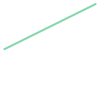

In [9]:
print(gdf['geometry'][1000])
gdf['geometry'][1000]

In [56]:
idx = 37000

overlay = gdf.iloc[idx:idx+1]
overlay


FID  OBJECTID      ID           TYPE         STATUS NAICS_CODE  \
37000  37001     36960  124385  NOT AVAILABLE  NOT AVAILABLE     221121   

                                         NAICS_DESC  \
37000  ELECTRIC BULK POWER TRANSMISSION AND CONTROL   

                                         SOURCE           SOURCEDATE  \
37000  IMAGERY, OpenStreetMap, EIA 861, EIA 860  2014-11-24T00:00:00   

       VAL_METHOD  ...                          OWNER VOLTAGE  VOLT_CLASS  \
37000  UNVERIFIED  ...  PUBLIC SERVICE CO OF OKLAHOMA    69.0   UNDER 100   

      INFERRED      SUB_1          SUB_2    SHAPE__Len  \
37000        Y  TAP148872  DEADEND172608  12323.641257   

                                     GlobalID SHAPE_Length  \
37000  {88B48109-FB47-4281-9203-073210C4398F}      0.09535   

                                                geometry  
37000  MULTILINESTRING ((-95.83037 36.23529, -95.8303...  

[1 rows x 21 columns]

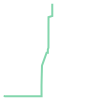

In [64]:
overlay['geometry'].values[0]

length of this segment = 37000    12323.641257
Name: SHAPE__Len, dtype: float64


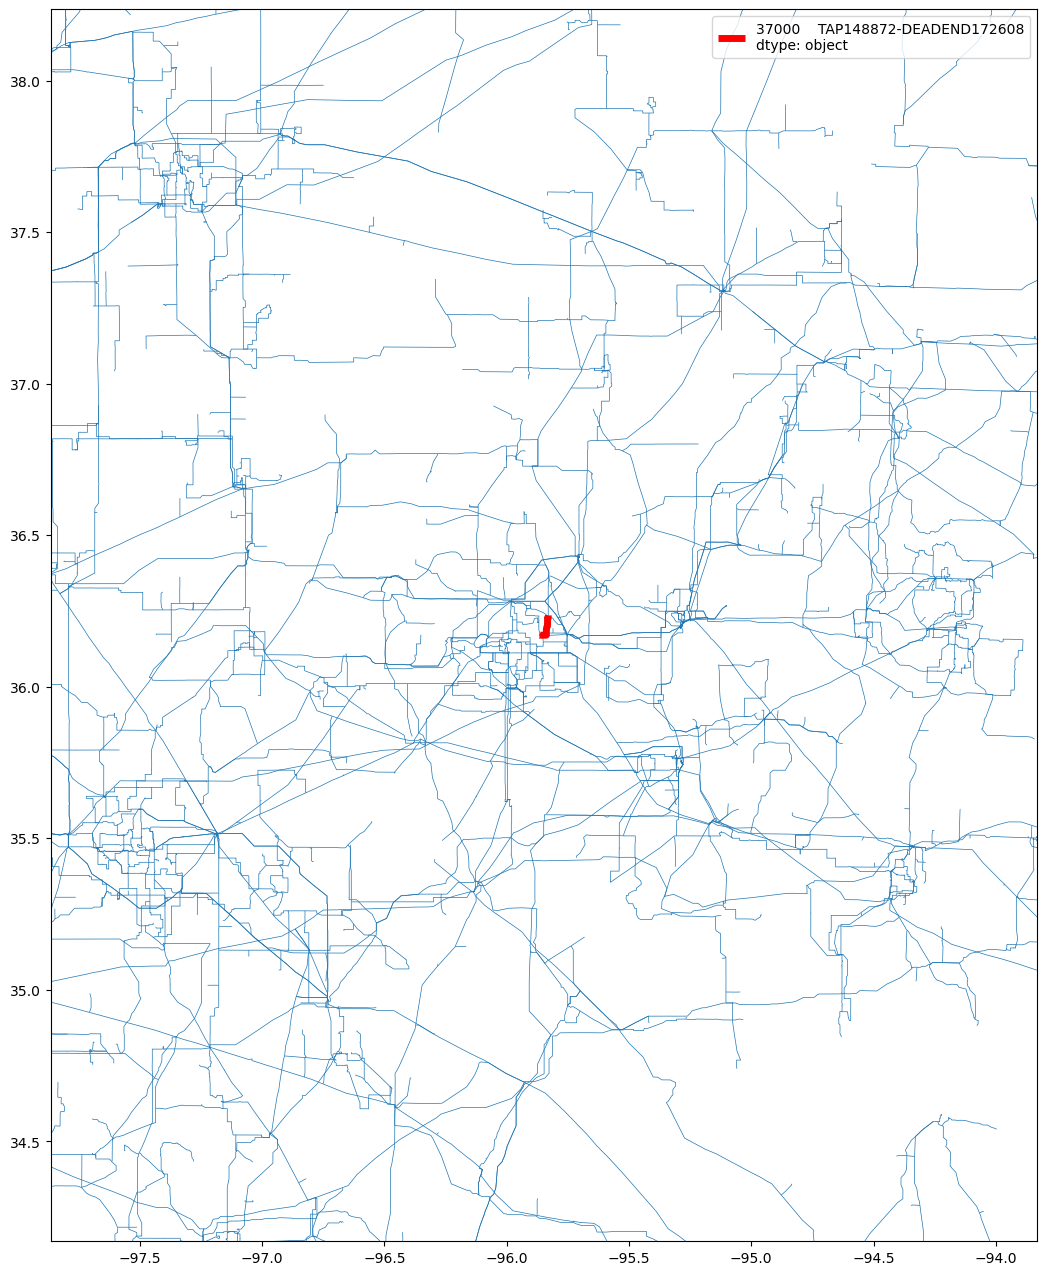

In [58]:
idx = 37000

map = gdf.plot(figsize=(20, 16),linewidth=0.5)
overlay = gdf.iloc[idx:idx+1]
overlay.plot(ax=map, marker='o', color='r',markersize=200, linewidth=5, label=overlay['SUB_1']+'-'+overlay['SUB_2'])

# Set xy axis limits
bounds = overlay.geometry.boundary.explode(index_parts=True).unstack()
# map.set_xlim((-130, -65))
# map.set_ylim((25,50))
map.set_xlim((bounds[0].x.values[0]-2., bounds[1].x.values[0]+2.))
map.set_ylim((bounds[0].y.values[0]-2., bounds[1].y.values[0]+2.))

print('length of this segment = {}'.format(overlay['SHAPE__Len']))

map.legend(loc='upper right')



Text(0.5, 1.0, 'Major US Transmission Lines')

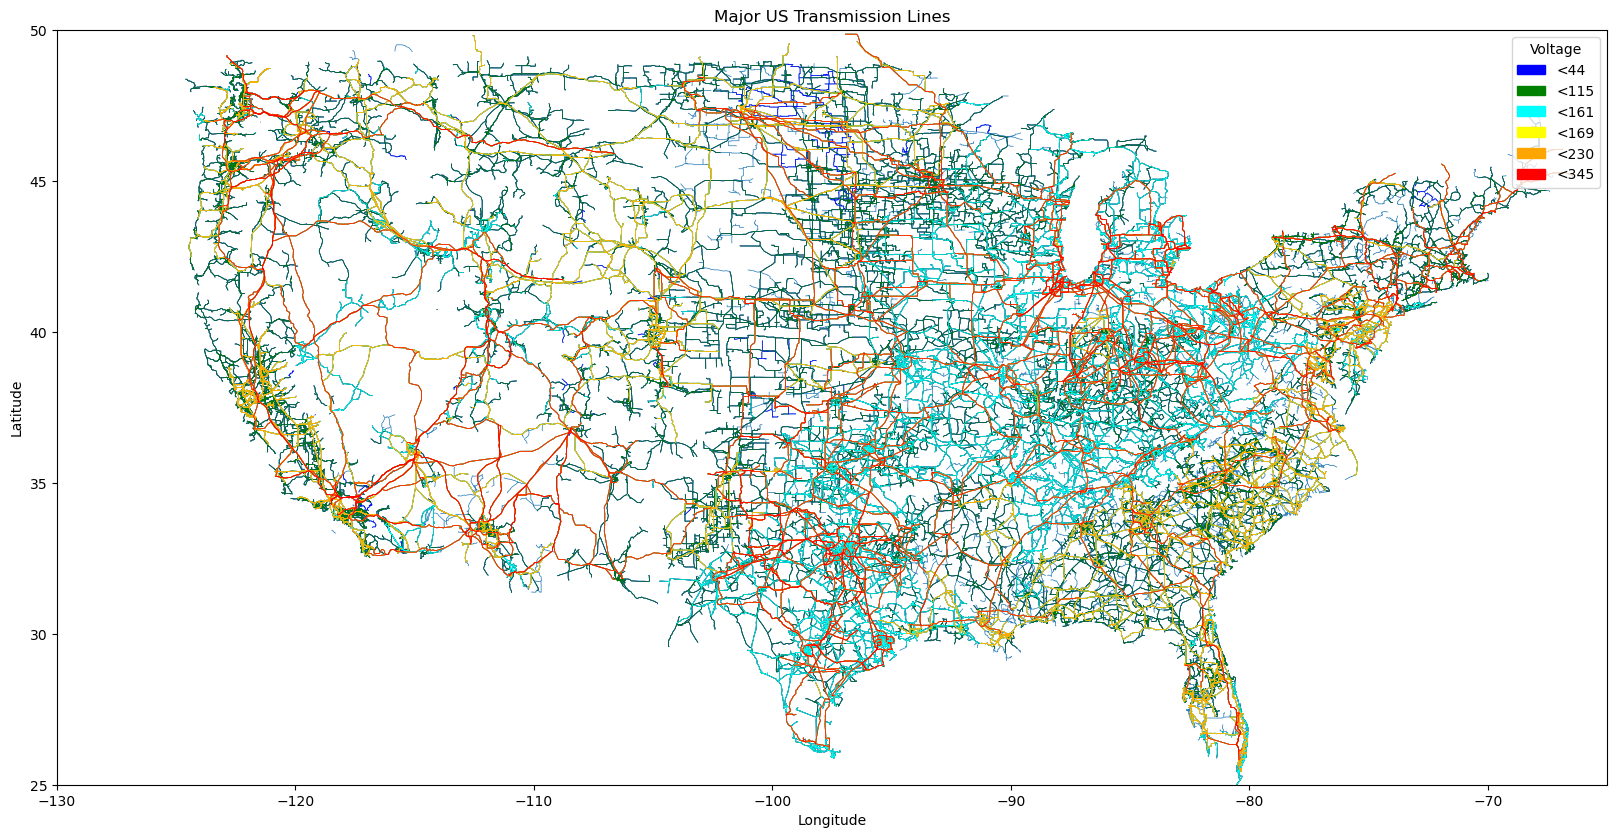

In [10]:
# Plot the GeoDataFrame
map = gdf.plot(figsize=(20, 16),linewidth=0.5)

# Define common voltages and corresponding colors
common_voltages = [0, 44, 115, 161, 169, 230, 345]

hex_colors = ['blue','green', 'cyan', 'yellow', 'orange', 'red']
legend_labels = ['<' + str(i) for i in common_voltages[1:]]

# Plot overlays for each common voltage
for voltage, color, label in zip(common_voltages, hex_colors, legend_labels):
    overlay = gdf[gdf['VOLTAGE'] > voltage]  # Filter GeoDataFrame based on voltage
    overlay.plot(ax=map, marker='o', color=color, markersize=5, linewidth=0.5, label=label)
    
# Create a custom legend with colored patches
legend_handles = [Patch(color=color, label=label) for color, label in zip(hex_colors, legend_labels)]

# Add legend
map.legend(handles=legend_handles, title='Voltage', loc='upper right')

# Set xy axis limits
map.set_xlim((-130, -65))
map.set_ylim((25,50))

# Put labels on the map
map.set_xlabel("Longitude")
map.set_ylabel("Latitude")
map.set_title("Major US Transmission Lines")


In [108]:
# Convert datetime strings to numeric timestamps
gdf['timestamp'] = pd.to_datetime(gdf['SOURCEDATE']).apply(lambda x: int(x.timestamp()))

# Create an initial Folium map
map_center = [39.8283, -98.5795]
initial_map = folium.Map(location=map_center, zoom_start=4)

folium.GeoJson(gdf).add_to(initial_map)

In [5]:
# display(initial_map)


In [110]:
multilines = gdf['geometry']
for idx, multiline in multilines.items():
    for line in multiline.geoms:  # Iterating over the line strings in the MultiLineString
        x_coords, y_coords = line.xy

AttributeError: 'LineString' object has no attribute 'geoms'

In [122]:
for line in multiline.xy:
    print(line)
    x_coords, y_coords = line
x_coords = multiline.xy[0]
y_coords = multiline.xy[1]
print(y_coords)

array('d', [-70.92855369023208, -70.9284093004232])
array('d', [42.54359004407545, 42.544105501192305])
array('d', [42.54359004407545, 42.544105501192305])


### Analyze the physical network

In [65]:
gdf_exploded = gdf.explode()

/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_30620/2915452980.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_exploded = gdf.explode()


In [26]:
gdf['SUB_1'].values

array(['Waters River', 'Phillips Bend', 'Tap140359', ..., 'Tap204261',
       'Tap161754', 'Unknown202234'], dtype=object)

In [106]:
subs1 = [s1 for s1 in gdf['SUB_1'].values]
subs2 = [s2 for s2 in gdf['SUB_2'].values]
subs_total = list(set(subs1+subs2))

In [107]:
len(subs_total)

67802

In [133]:
gdf

OBJECTID_1  OBJECTID      ID          TYPE         STATUS NAICS_CODE  \
0               1         1  100511  AC; Overhead     In Service     221121   
1               2         2  140809  AC; Overhead     In Service     221121   
2               3         3  140837  AC; Overhead     In Service     221121   
3               4         4  140811  AC; Overhead     In Service     221121   
4               5         5  140813  AC; Overhead     In Service     221121   
...           ...       ...     ...           ...            ...        ...   
94211       94212     94212  313969  AC; Overhead     In Service     221121   
94212       94213     94213  313970  AC; Overhead     In Service     221121   
94213       94214     94214  202495  AC; Overhead  Not Available     221121   
94214       94215     94215  202496  AC; Overhead  Not Available     221121   
94215       94216     94216  166911  AC; Overhead  Not Available     221121   

                                         NAICS_DESC  \
0      Electric Bulk Power Transmission and Control   
1      Electric Bulk Power Transmission and Control   
2      Electric Bulk Power Transmission and Control   
3      Electric Bulk Power Transmission and Control   
4      Electric Bulk Power Transmission and Control   
...                                             ...   
94211  Electric Bulk Power Transmission and Control   
94212  Electric Bulk Power Transmission and Control   
94213  Electric Bulk Power Transmission and Control   
94214  Electric Bulk Power Transmission and Control   
94215  Electric Bulk Power Transmission and Control   

                                                  SOURCE           SOURCEDATE  \
0                              Imagery, EIA 861, EIA 860  2016-11-08T00:00:00   
1                                       Imagery, EIA 860  2014-04-16T00:00:00   
2      Imagery, https://www9.nationalgridus.com/oasis...  2015-06-16T00:00:00   
3                                 Imagery, OpenStreetMap  2014-06-20T00:00:00   
4                                       Imagery, EIA 860  2016-10-04T00:00:00   
...                                                  ...                  ...   
94211                                            Imagery  2018-08-28T00:00:00   
94212                                            Imagery  2018-10-16T00:00:00   
94213                                            Imagery  2019-04-10T00:00:00   
94214                                            Imagery  2019-04-10T00:00:00   
94215                                            Imagery  2019-04-10T00:00:00   

          VAL_METHOD  ...                                            OWNER  \
0            Imagery  ...                                    Not Available   
1            Imagery  ...                               Kingsport Power Co   
2            Imagery  ...                       Niagara Mohawk Power Corp.   
3            Imagery  ...                         Entergy New Orleans, Llc   
4      Imagery/other  ...                            Midamerican Energy Co   
...              ...  ...                                              ...   
94211  Imagery/other  ...      Sulphur Springs Valley Electric Cooperative   
94212  Imagery/other  ...  Graham County Electric Cooperative Incorporated   
94213        Imagery  ...                            City Of Gering - (Ne)   
94214        Imagery  ...                            City Of Gering - (Ne)   
94215        Imagery  ...                            City Of Gering - (Ne)   

      VOLTAGE  VOLT_CLASS INFERRED          SUB_1            SUB_2  \
0       115.0     100-161      Yes   Waters River        Tap136228   
1       161.0     100-161      Yes  Phillips Bend      John Sevier   
2       115.0     100-161      Yes      Tap140359        Tap140373   
3       115.0     100-161      Yes  Gentilly Road  Michoud Station   
4       161.0     100-161      Yes  Unknown137689        Tap137690   
...       ...         ...      ...            ...              ... 

In [66]:
idx

37000

In [104]:
for g in range(idx,idx+1):
    print('Sub {} to Sub {} has geometry {}'.format(gdf['SUB_1'].values[g],gdf['SUB_2'].values[g],gdf['geometry'].values[g]))
    

Sub TAP148872 to Sub DEADEND172608 has geometry MULTILINESTRING ((-95.83037188399999 36.235287077000066, -95.83034687199995 36.22664251300006, -95.83300155299997 36.22583247400007, -95.83303095999997 36.21962752600007, -95.833047 36.205945093000025, -95.83306036699997 36.20427422200004, -95.83348543699998 36.203041787000075, -95.833490784 36.20072395400007, -95.83435161699998 36.20072662700005, -95.83759858399998 36.19170910500003, -95.83773778299997 36.18668725300006, -95.837819874 36.18354993400004, -95.83794479599999 36.17717892700006, -95.83791504099997 36.171368200000074, -95.83790016899997 36.17010411100006, -95.84965173199998 36.17008031600005, -95.85652242599997 36.17009221400008, -95.86225395299994 36.170065445000034, -95.86342583699997 36.17005949600008, -95.86457770399994 36.170260323000036))


In [87]:
line_tmp = gdf['geometry'].values[idx]
print(line_tmp)

# for pt1,pt2 in zip(line_tmp.coords, line_tmp.coords[1:]):
#     print(pt1,pt2)

MULTILINESTRING ((-95.83037188399999 36.235287077000066, -95.83034687199995 36.22664251300006, -95.83300155299997 36.22583247400007, -95.83303095999997 36.21962752600007, -95.833047 36.205945093000025, -95.83306036699997 36.20427422200004, -95.83348543699998 36.203041787000075, -95.833490784 36.20072395400007, -95.83435161699998 36.20072662700005, -95.83759858399998 36.19170910500003, -95.83773778299997 36.18668725300006, -95.837819874 36.18354993400004, -95.83794479599999 36.17717892700006, -95.83791504099997 36.171368200000074, -95.83790016899997 36.17010411100006, -95.84965173199998 36.17008031600005, -95.85652242599997 36.17009221400008, -95.86225395299994 36.170065445000034, -95.86342583699997 36.17005949600008, -95.86457770399994 36.170260323000036))


In [151]:
for line in gdf['geometry']:
    print(line)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [100]:
def get_start_end_coordinates(geom):
    start_points = []
    end_points = []
    for line in geom.geoms:  # Access individual LineString geometries within the MultiLineString
        start_points.append(line.coords[0])   # Get the first coordinate of each LineString
        end_points.append(line.coords[-1])    # Get the last coordinate of each LineString
    return start_points, end_points

# Apply the function to the MultiLineString geometry
gdf['start_points'], gdf['end_points'] = zip(*gdf['geometry'].apply(lambda geom: get_start_end_coordinates(geom)))



In [88]:
print( 'Sub1 {} to Sub2 {}'.format(gdf['SUB_1'].values[idx],gdf['SUB_2'].values[idx]))

Sub1 TAP148872 to Sub2 DEADEND172608


In [147]:
for _, row in gdf_exploded.iterrows():
    if row['geometry'].geom_type == 'MultiLineString':
        # If the geometry is a multi-part linestring, iterate over each part
        print(row['geometry'])
#         for line in row['geometry']:
#             print('multilinestring, line = {}'.format(line))

In [148]:
for _, row in gdf_exploded.iterrows():
    if row['geometry'].geom_type == 'MultiLineString':
        print('exploded GDF should not reach here')
    elif row['geometry'].geom_type == 'LineString':
        print(row['geometry'].coords[0])

(-70.92855369023208, 42.54359004407545)
(-82.96123095595433, 36.3769930829573)
(-75.3340663089588, 43.08946163671524)
(-89.93727857139062, 30.009051135160774)
(-90.56608759936212, 41.612560400756344)
(-86.83214468570017, 33.855089844755796)
(-71.02485606390991, 42.394873509853)
(-75.33410000027352, 43.08901599996714)
(-90.53585083420973, 41.81095259705799)
(-81.78569824494853, 41.40841954286767)
(-90.06720340123788, 31.589483328382542)
(-94.48205922116495, 39.13329544387411)
(-80.5960297937522, 34.27358118263512)
(-90.24758674342627, 32.33969076694672)
(-83.13040331800701, 38.312087521671046)
(-83.55530313261214, 41.594283425209596)
(-90.17901807188811, 36.58693183009219)
(-103.84608401297604, 44.40318514273074)
(-86.84447155937002, 33.30877297680985)
(-79.72569149980579, 34.96080750028461)
(-82.28903053294879, 34.82895261015645)
(-94.2551417270227, 39.00924585694064)
(-100.97189291113051, 37.92639117000692)
(-93.51582520559846, 32.525431948691306)
(-97.65605799965513, 44.8988329998888

(-79.70762478044094, 35.790509594967666)
(-95.75100329819387, 34.94738274584047)
(-101.4239261044322, 41.098305315014215)
(-76.14296005037214, 40.19901418809314)
(-81.91038432463765, 39.866464156679186)
(-86.63911475134749, 30.741959881225352)
(-84.38325558768723, 42.72765059886569)
(-87.76566679813045, 43.789307829888955)
(-76.68896132891619, 38.56030499180836)
(-103.98152699957754, 46.222418000138866)
(-82.17509678595066, 35.265345379962184)
(-72.86641492336156, 41.58843888387615)
(-77.67071675576194, 36.47468480628676)
(-79.72653552989728, 41.44849665815582)
(-84.11936933299215, 37.13512683926265)
(-84.37879648895742, 34.386529415075195)
(-94.22779998589264, 39.32571013380076)
(-92.55399424287124, 44.035586444312514)
(-85.82145211157642, 33.629869277110494)
(-80.34361755578946, 35.8058205457318)
(-76.90595623904257, 39.089945939345135)
(-90.81700940830096, 29.819418339240002)
(-84.07318615102318, 35.90429772221598)
(-82.47208399963992, 29.571757999627938)
(-94.4342875922965, 36.1081

(-82.76128599985194, 37.64353499966814)
(-87.52475006819496, 38.016645454758134)
(-87.64030682836635, 38.0140750002355)
(-89.63670366522135, 39.82637524304069)
(-75.37978232116595, 41.034613761854395)
(-75.47927461960421, 41.35492585179321)
(-89.61691308960606, 39.81390978520885)
(-89.62596051780415, 39.84146049494386)
(-90.17667250330763, 38.66400973065381)
(-90.14292284030408, 38.66893713370391)
(-89.77406372131787, 38.36942585179938)
(-89.84844068837906, 38.303696536925315)
(-90.17667250330763, 38.66400973065381)
(-90.13612539724528, 38.61471547377774)
(-90.13612539724528, 38.61471547377774)
(-88.92699818294678, 37.75510011177592)
(-75.3726837547391, 41.049543456318894)
(-75.3726837547391, 41.049543456318894)
(-87.99719688164355, 40.76471351232569)
(-87.58387581924806, 40.74624474129413)
(-88.75599526904242, 37.96956562018141)
(-84.82793999961945, 45.063713999741964)
(-87.49051499962931, 40.76860500015181)
(-87.57807522857523, 40.71699694093252)
(-90.01496113028824, 38.5132580190793

(-95.72381309027584, 39.01512024905863)
(-95.67254591541425, 39.075605539846585)
(-95.66603494869284, 39.05650581726534)
(-95.67254591541425, 39.075605539846585)
(-95.93499760282141, 39.75372705880813)
(-97.54635977508566, 39.503391588760174)
(-97.54424557569145, 39.427651154658044)
(-99.36838215638329, 36.311798882788445)
(-79.08144020033494, 36.47653279996084)
(-96.40570696491604, 36.01070691016187)
(-99.36838215638329, 36.311798882788445)
(-97.68868616363719, 37.4301685543507)
(-97.68868616363719, 37.4301685543507)
(-77.64717949933605, 36.47985987899627)
(-77.44708014888748, 36.51208680924463)
(-77.42169891169472, 34.77054131076587)
(-77.42282790356404, 34.777677998641856)
(-76.30061334697761, 36.271764538830205)
(-89.40852560297014, 31.32199281802659)
(-77.71277809979642, 34.403728600231055)
(-78.91381101727791, 36.48984104981525)
(-78.86341270014566, 36.47459149990363)
(-79.05584360013765, 36.45329239980038)
(-98.75361878285074, 35.93201070020427)
(-95.40386943039921, 35.973591794

(-73.93052139524598, 42.9771610248915)
(-78.49363109670261, 42.26584328175251)
(-79.84048757737438, 34.50626511967577)
(-78.5809986208504, 42.8321903138579)
(-76.38616866107517, 39.6990365692858)
(-81.37223706692829, 38.26657980518803)
(-76.540392862764, 39.68741801379712)
(-88.78351185376779, 33.60977017162779)
(-88.80255886058477, 33.505333039758284)
(-73.08632172607467, 41.7377419950521)
(-70.76915000024437, 43.11611699995281)
(-70.72966837156748, 43.121303064685144)
(-70.67916087589056, 43.14855057132757)
(-70.44766123897739, 43.49480051609043)
(-69.38916370399657, 45.160292394705095)
(-68.16067257521517, 46.09811667397186)
(-68.27776999999774, 46.016462000302134)
(-76.71745826577241, 40.001262774163216)
(-76.23274088236104, 38.96610939367768)
(-67.66713421721076, 46.54338492782155)
(-68.74304423661984, 44.82960989881914)
(-68.43193199964136, 45.89702100019963)
(-67.95238534775149, 46.70897683175321)
(-68.27776999999774, 46.016462000302134)
(-68.77485836795266, 44.82091257105054)
(

(-100.76144277402466, 37.165363612697476)
(-87.2844857307514, 37.98973342677122)
(-86.16640032258924, 40.094113054131775)
(-86.07574932941557, 40.101143472980446)
(-86.2030690000231, 39.977512999880034)
(-86.23791625698016, 39.96296785580244)
(-93.23246020028616, 42.62875246121573)
(-86.67399034476185, 33.694983227054706)
(-78.6402645135794, 43.178838177258044)
(-94.34453122592438, 34.02777533619218)
(-85.29919618778708, 34.54091549094372)
(-88.40185729985956, 43.784097322265204)
(-91.97240109562777, 41.00608226131029)
(-97.4468701158977, 35.174413440231405)
(-101.33144797030997, 47.277020404191184)
(-92.10795940435219, 32.4075041018623)
(-80.96711685591558, 40.24183828615102)
(-87.43308962825505, 32.14659465695813)
(-87.9766377919128, 42.31112176213397)
(-93.8118722209518, 41.660034306891994)
(-87.85631716787336, 32.47666131187947)
(-100.97189291113051, 37.92639117000692)
(-86.25033704322476, 39.94026779789722)
(-91.37397687606581, 30.6830310411336)
(-76.77207308710041, 39.01527563719

(-85.7084442087343, 34.172622521645486)
(-97.83889204385497, 39.797768878127656)
(-79.60587637484471, 33.474549738695515)
(-98.4272895152523, 36.375366565264805)
(-78.96165529919159, 33.765079214975195)
(-71.177050518621, 41.72788443088847)
(-81.08921800013695, 34.36885599997797)
(-84.85497575300417, 39.350297443753206)
(-76.3031298020746, 43.042550674138845)
(-84.86280569090442, 39.0851749783424)
(-82.52193985830806, 42.85108550606127)
(-83.54571027342467, 30.06158929829176)
(-78.93040677231448, 40.193119757197984)
(-77.46011623798255, 37.616885131811166)
(-89.79785499974653, 43.97431100027873)
(-74.11705482575331, 40.7919219700461)
(-84.15519660072019, 32.196812856130336)
(-75.57775637443329, 40.51917922790664)
(-83.59267903390625, 32.60025267320512)
(-78.99034164941871, 39.55691717820713)
(-98.42659667880963, 36.39118818199689)
(-83.34612491472717, 33.97661739099344)
(-92.09045455334979, 40.453601644142346)
(-79.41317169889683, 36.10532142623915)
(-71.04165486964172, 42.505261779084

(-75.0914588858782, 42.44381614084895)
(-94.3435021878001, 34.02816419617817)
(-94.30274599975371, 34.24208699968787)
(-78.9428886035742, 36.42004302709301)
(-81.8415150525509, 37.90577057674879)
(-98.52852999991215, 44.88683100012753)
(-94.30274599975371, 34.24208699968787)
(-82.66154596761788, 34.796984096093624)
(-83.34775930416521, 36.04752844527602)
(-94.31043699972055, 34.28876099991285)
(-81.17538717888223, 32.35189548220549)
(-87.6239990031413, 34.82743899281104)
(-72.04465500020598, 44.13963199990486)
(-94.40657414267493, 34.451614638031906)
(-91.84798912696617, 46.955932140195124)
(-85.94602599977136, 37.846425000319975)
(-87.74702155204454, 42.024660438320545)
(-78.47002499968157, 43.01290399986715)
(-90.50411575013034, 38.824997240949145)
(-81.0634109992288, 35.02538849504286)
(-71.10545754560967, 41.86529405083033)
(-80.7484204782506, 36.75858586225398)
(-77.35839012497841, 35.661922214846186)
(-78.5132492451907, 34.975988675195765)
(-84.29641030002819, 33.48453289963834)


(-94.05031899977593, 46.72371300005514)
(-92.38970180971626, 43.841463544166686)
(-80.64674179629345, 40.25508471800629)
(-86.93627500032339, 37.75634499999084)
(-84.26217819230973, 37.88052993697663)
(-91.77700192029025, 42.10071379302842)
(-74.95755514634637, 44.58342945396942)
(-94.13359499963849, 46.73250100017907)
(-83.27357051259646, 39.71706695014645)
(-82.38238329557772, 29.613954415826317)
(-74.69924700556085, 40.79420234201673)
(-82.79129839099919, 27.972347746973064)
(-80.64618750971201, 34.22881287898299)
(-73.09688667828223, 41.52256489769587)
(-84.6255320157216, 33.83531465363277)
(-89.18316399988315, 44.400638999769384)
(-70.97556489341588, 42.50699043029948)
(-93.0593859824407, 31.765132351866892)
(-76.90196486703005, 38.62795107305769)
(-83.16395500040677, 39.678492999782684)
(-84.1214962462426, 33.75634064497482)
(-79.16926359433657, 34.92979902981361)
(-80.68906183626514, 35.70975124773647)
(-77.88580089987164, 34.21702750036377)
(-81.93077848907211, 38.4393491887485

(-76.59843887657483, 42.849770510802486)
(-95.54404525126223, 34.87232617681246)
(-96.8417649998036, 46.688387999991534)
(-98.03607699990873, 40.872149000338815)
(-95.29086040017141, 44.123164904833615)
(-88.7593972968212, 40.370593352694456)
(-93.55650982037461, 32.16290787008422)
(-71.99329870168843, 44.3194191242705)
(-91.4524049998183, 44.85913100023375)
(-75.29390640103843, 43.086124089715234)
(-91.85218718066429, 32.79363395209551)
(-84.12683307087022, 33.59219569914872)
(-81.17036736971838, 35.4454584376545)
(-81.96092953877671, 35.14157080805931)
(-88.16731942680653, 33.12030753510189)
(-79.78109031501823, 36.1224182861465)
(-90.37911439860744, 33.64136729815192)
(-82.1022307169254, 35.35433614827352)
(-86.1886671563875, 39.81006146782284)
(-80.37757056323737, 35.71284785580081)
(-84.76421669519674, 42.252302659249146)
(-81.92232234097717, 27.95236782317021)
(-91.87413796917927, 44.90027458468656)
(-82.63908968810937, 35.821497766324036)
(-92.29733199984086, 44.758500000265165)

(-88.28122021821012, 37.68651948126117)
(-99.23681123204983, 35.0367773156811)
(-86.28517559730332, 31.237938639702037)
(-87.52102027391507, 41.70676865101097)
(-82.01046976359001, 28.094651678371356)
(-89.36491164583288, 43.22073890793714)
(-90.21142928374589, 38.6960547951555)
(-99.39887384544701, 35.38812541720245)
(-88.29743500042964, 37.46142099979589)
(-94.1051838276374, 45.479743960865335)
(-88.1670680000366, 37.53989399989901)
(-88.40618500021613, 37.448929000187746)
(-97.51138480284804, 35.27444435989202)
(-85.21736550355483, 31.87361825820013)
(-88.67926200032973, 37.37642299976883)
(-79.41517629124998, 36.60266246189399)
(-88.40618500021613, 37.448929000187746)
(-80.78310462540654, 36.26143572782731)
(-91.4671858552487, 34.79361481636246)
(-87.10219277418655, 35.42511764284805)
(-84.33315412782378, 33.605777487279205)
(-81.76643951240564, 35.03382403014144)
(-86.11461293514328, 35.33745991833379)
(-81.22881577667421, 41.59554045692292)
(-78.18067350902648, 34.84946922368936)

(-81.74302225742699, 26.140464566136227)
(-82.43066309870744, 27.357966738726006)
(-83.76437099965098, 32.4598069999473)
(-79.87277912105988, 37.34950126905973)
(-95.74962623655885, 38.19311432275204)
(-86.71208886704017, 33.81728396023279)
(-96.73925952013705, 34.73778913914491)
(-86.12513642201564, 30.361234905204125)
(-81.09067000013128, 32.09460400014124)
(-78.66631320441813, 38.353003801198376)
(-78.91858021893539, 42.97857471773353)
(-81.55348599967333, 38.243836000043224)
(-79.27157681297275, 39.20299547773255)
(-87.49198157658576, 37.97626433305157)
(-102.99917631488857, 42.84759672409048)
(-80.0924380606198, 40.651263662210646)
(-101.53267594072531, 39.75645205715208)
(-87.47518700012232, 36.87589799978437)
(-92.79141906768545, 45.03293239300326)
(-70.9491633479268, 41.71940619525624)
(-84.1808410505794, 35.89414606024211)
(-78.68282111320305, 35.79100546466598)
(-77.98395034002934, 34.28182291013794)
(-81.7913473167824, 33.548405489727685)
(-85.0104836283694, 37.1116468768830

(-94.00588097221447, 37.16326324734056)
(-93.03903959670124, 37.264903839799)
(-93.11831198590384, 37.09286037520159)
(-93.11831198590384, 37.09286037520159)
(-93.22601304179769, 37.08501581104361)
(-92.6655765516968, 36.97604059893332)
(-92.6655765516968, 36.97604059893332)
(-93.30525102911817, 37.604989488790274)
(-89.86403698142378, 36.364342526313855)
(-93.29197053807869, 37.940682195770115)
(-93.30525102911817, 37.604989488790274)
(-93.30777440573442, 37.45769011272818)
(-93.30777440573442, 37.45769011272818)
(-92.75225099955173, 37.994988000300125)
(-95.14283101391955, 39.991956931252)
(-95.11044270371163, 35.89328910295235)
(-95.3222300001859, 35.71370199985636)
(-89.98299789478793, 36.602839884665386)
(-89.9735210000188, 36.60398399987627)
(-89.9735210000188, 36.60398399987627)
(-89.86571470828606, 36.60549110017149)
(-89.68135481359239, 36.49078771904121)
(-89.70237259298868, 36.36501496228003)
(-95.75100329819387, 34.94738274584047)
(-94.62970116583142, 35.11518709924506)
(-8

(-76.35971347179058, 40.0936403447668)
(-95.14486164573783, 45.088199651799286)
(-92.81293498177139, 44.59924182904739)
(-84.3535664813461, 39.443055916131804)
(-95.08389819763329, 45.08878415172882)
(-93.324859418309, 44.74252945187193)
(-95.5532721466844, 44.8277277833175)
(-94.3087370287752, 46.61644310517194)
(-76.735487055571, 39.94786988596236)
(-95.49331078814393, 45.02086541130709)
(-94.22044803886011, 46.61673869814424)
(-94.22044803886011, 46.61673869814424)
(-93.29755430778128, 44.71743336127968)
(-92.98579137433012, 45.31180882314341)
(-92.9125593487261, 45.461579274897844)
(-92.95685946602683, 45.195697743942695)
(-96.29972700025819, 46.97751800025392)
(-95.5429319915885, 44.036329893720385)
(-96.11597673914724, 46.659862097001046)
(-90.70749768386594, 47.643389778905956)
(-95.42132611283778, 44.036108099104084)
(-95.42132611283778, 44.036108099104084)
(-94.92943365169018, 43.984869681104215)
(-94.79086050793903, 43.96371058086591)
(-94.29373375227709, 46.39089792394515)
(

(-85.49289580809923, 42.280817533205195)
(-85.49289580809923, 42.280817533205195)
(-85.55074539808666, 42.27017198884029)
(-95.05426661131813, 45.12156924769892)
(-93.32195810338474, 30.19664138268851)
(-73.2901579162899, 40.88129217928772)
(-82.43533465259523, 34.60226573364846)
(-73.9093125998843, 40.787692859154)
(-73.9093125998843, 40.787692859154)
(-73.90560811114598, 40.78736711316907)
(-93.63449943511444, 42.56327963620061)
(-80.88968599957069, 34.55588000010326)
(-80.89329305882993, 34.55900463324047)
(-80.87551681240714, 34.541346160069004)
(-89.03244382428373, 42.5064269849712)
(-73.63942968373091, 43.305533391708856)
(-73.63703159065577, 43.308088370962594)
(-73.64092751577103, 43.306618558743985)
(-72.85224837904158, 40.85843516683727)
(-89.20035753882553, 34.82897661077878)
(-75.45621303639264, 40.60792233166039)
(-76.26854245917028, 39.75803887419269)
(-76.26857517671122, 39.75901742713122)
(-80.51872165985152, 38.080709206243554)
(-87.64924788525501, 45.35470668083484)
(

(-114.42060848314301, 42.83567352998158)
(-113.68722650108195, 42.74467372971074)
(-114.42060848314301, 42.83567352998158)
(-113.68722650108195, 42.74467372971074)
(-114.42060848314301, 42.83567352998158)
(-114.42060848314301, 42.83567352998158)
(-114.4265632660411, 42.83467157673863)
(-112.93046075862591, 42.75030478068651)
(-112.93046075862591, 42.75030478068651)
(-112.5587366687552, 42.89269036813936)
(-112.5587366687552, 42.89269036813936)
(-112.12113890170771, 43.306245975110855)
(-111.59628125203969, 42.7104333217593)
(-112.15514172343306, 42.42474194811404)
(-112.15514172343306, 42.42474194811404)
(-112.15514172343306, 42.42474194811404)
(-112.15514172343306, 42.42474194811404)
(-112.15514172343306, 42.42474194811404)
(-112.04724778756962, 41.340060929232806)
(-112.04724778756962, 41.340060929232806)
(-112.04724778756962, 41.340060929232806)
(-112.04724778756962, 41.340060929232806)
(-112.04356570011956, 41.09473538121953)
(-112.00609523497208, 40.75837222682985)
(-112.006095234

(-117.5736401032015, 47.671470538252436)
(-111.80291898219888, 40.44878368917308)
(-111.79185891992924, 40.430144790053454)
(-111.7890742036339, 40.34935647628774)
(-111.86869062513243, 40.4060741600442)
(-111.86827588464385, 40.418719805669646)
(-111.73353153939837, 40.316416360849885)
(-111.7352213180585, 40.28490190984717)
(-109.317610775806, 37.86860590398908)
(-109.54839189973073, 37.30420130005917)
(-109.54839189973073, 37.30420130005917)
(-109.37285800031425, 37.28180258906419)
(-109.37285800031425, 37.28180258906419)
(-109.37285800031425, 37.28180258906419)
(-109.29770453580966, 37.208842692977505)
(-109.38027800011943, 37.207681000248876)
(-109.3079704137063, 38.16008149571894)
(-109.3104767780277, 38.146142137260725)
(-109.3079704137063, 38.16008149571894)
(-109.31724053785659, 38.30015969067251)
(-109.2993207514312, 38.259569087130025)
(-109.3079704137063, 38.16008149571894)
(-109.31778916056017, 38.299934988689934)
(-109.31778916056017, 38.299934988689934)
(-109.60740333028

(-112.47826799488537, 48.624474952053426)
(-112.47826799488537, 48.624474952053426)
(-112.47826799488537, 48.624474952053426)
(-112.36084189091338, 48.50562706095955)
(-112.35335896142759, 48.62392997014986)
(-112.35200680288888, 48.62434403912727)
(-122.98186855367136, 48.51823702614503)
(-122.9153755896158, 48.547894830761486)
(-122.92883176597203, 48.56581194513159)
(-122.94810877114612, 48.572911860197486)
(-122.94810877114612, 48.572911860197486)
(-122.95549461790254, 48.585675289237024)
(-122.94506076133595, 48.59927993704121)
(-122.9446796106525, 48.62867060291611)
(-122.9446796106525, 48.62867060291611)
(-122.82388554481392, 48.61778411882617)
(-122.80921761480124, 48.585577163709516)
(-122.81457164036993, 48.52426690122431)
(-122.80471264539811, 48.50683558698876)
(-122.80471264539811, 48.50683558698876)
(-122.8216202784333, 48.50537052711164)
(-122.7971301520361, 48.50695572375509)
(-123.011927094868, 48.52923132472283)
(-122.69026829329754, 48.50060231475623)
(-122.650396769

(-93.96222200139664, 29.834999999687327)
(-93.97314200104213, 29.89656499974038)
(-121.42218949600817, 38.61274376234033)
(-106.46474911306481, 35.385859866322974)
(-95.22735048335794, 29.71718769609206)
(-121.79636454570681, 37.24497153472233)
(-93.95045116422641, 29.88482726996139)
(-105.95724386400727, 35.653808125775)
(-106.4461793748701, 31.861168116053474)
(-117.04672167066097, 32.74375919191136)
(-93.79818600042434, 30.698379999967454)
(-93.94009657140724, 29.924721168955784)
(-93.96214100120578, 29.87070799985316)
(-93.9453966288886, 29.888905582302332)
(-93.95778316596467, 29.891717145640023)
(-93.97209644469643, 29.87393290600951)
(-93.8899277217278, 29.945671946133547)
(-93.8899277217278, 29.945671946133547)
(-103.09309306680235, 32.71171046786292)
(-122.08039899982333, 38.228647999272816)
(-119.34104638397014, 36.20499462526743)
(-93.8792346437096, 30.024429078351346)
(-93.882787528269, 29.953801276983942)
(-93.97209644469643, 29.87393290600951)
(-93.96984543098611, 29.8708

(-120.09984600026434, 36.61702199998151)
(-122.78644432432056, 38.04217183211563)
(-103.08150507991158, 31.84839712521795)
(-98.31027501575022, 32.658849529863055)
(-121.76329382041182, 37.2146459642894)
(-104.43853100074095, 32.92977000033486)
(-99.68823286128924, 29.228010390292578)
(-123.98060485858733, 40.87983812097001)
(-121.42956700011052, 38.532028999942796)
(-121.17871402278368, 38.60317184369093)
(-115.78897423126595, 32.82670446275969)
(-120.12875217003811, 36.14232774883947)
(-112.05803946197848, 33.50149424402746)
(-98.01705924762732, 29.651184760752525)
(-96.93538502200936, 32.724366363813175)
(-121.86411688670526, 37.36086726197157)
(-122.32900687615107, 40.4508796047279)
(-98.71819022068344, 29.416135657964748)
(-111.94234019396872, 33.35217457298387)
(-121.94196156635881, 37.43269340634714)
(-97.66586136375807, 30.419677556159225)
(-114.47834399966577, 32.669963998768175)
(-98.9715915998937, 29.19203799999286)
(-117.13718306091923, 32.78390711614498)
(-99.3312198070901

(-95.04664161506679, 29.626225488643684)
(-121.56443417559807, 38.58316496167057)
(-100.3521404966309, 32.43783246771341)
(-117.13718306091923, 32.78390711614498)
(-118.58171253328828, 34.43976898588138)
(-121.85411033715978, 37.669074829128455)
(-94.49609475338727, 32.467544730002196)
(-97.79407009969727, 33.26473450008252)
(-97.68721274061996, 30.265280870078183)
(-120.97952398479495, 37.63492167306598)
(-97.00539519403281, 32.86756367084108)
(-106.28571156664798, 31.617995050867588)
(-97.21375711641238, 32.63679996964321)
(-95.52483532598534, 29.818405706175593)
(-93.97106279911306, 29.87358849489964)
(-97.13085258519116, 32.65617156770471)
(-95.32202833109956, 29.677967719700206)
(-96.2222091411797, 31.080053544683576)
(-98.90131432100704, 32.774048415879)
(-101.35809250289688, 32.979358640944845)
(-94.18047145193641, 30.33957968418604)
(-121.19123943580941, 37.07557357198542)
(-97.6940074779531, 30.474249895809074)
(-111.59763202627454, 33.355665472177016)
(-122.09680407306782, 38

In [ ]:
# Create a graph
G = nx.Graph()

# # Iterate over each row in the GeoDataFrame
# for _, row in gdf_exploded.iterrows():
#     if row['geometry'].geom_type == 'MultiLineString':
#         # If the geometry is a multi-part linestring, iterate over each part
#         for line in row['geometry']:
#             start = line.coords[0]
#             end = line.coords[-1]
#             G.add_edge(start, end, geometry=line)
#     elif row['geometry'].geom_type == 'LineString':
#         # If the geometry is a single linestring, extract start and end points
#         start = row['geometry'].coords[0]
#         end = row['geometry'].coords[-1]
#         G.add_edge(start, end, geometry=row['geometry'])

# Iterate over each row in the GeoDataFrame
for _, row in gdf_exploded.iterrows():
    if row['geometry'].geom_type == 'MultiLineString':
        print('exploded GDF should not reach here')
    elif row['geometry'].geom_type == 'LineString':
        # If the geometry is a single linestring, extract start and end points
        if not G.has_node(row['SUB_1']):
            G.add_node(row['SUB_1'],pos=row['geometry'].coords[0])
        if not G.has_node(row['SUB_2']):
            G.add_node(row['SUB_2'],pos=row['geometry'].coords[-1])
#         start = row['geometry'].coords[0]
#         end = row['geometry'].coords[-1]
#         G.add_edge(start, end, geometry=row['geometry'])
        start = row['SUB_1']
        end = row['SUB_2']
        G.add_edge(start, end)

     

In [219]:
# Create a graph without exploding (will yield nodes only for substations themselves)

G = nx.Graph()

# Iterate over each row in the GeoDataFrame
for _, row in gdf.iterrows():
    if (row['SUB_1'] == 'NOT AVAILABLE') | (row['SUB_2'] == 'NOT AVAILABLE'):
        print('found Not Available substation, continuing...\n\n')
    if row['geometry'].geom_type == 'MultiLineString':
        if not G.has_node(row['SUB_1']):
            G.add_node(row['SUB_1'],pos= (row['start_points'][0][0],row['start_points'][0][1]) )
        if not G.has_node(row['SUB_2']):
            G.add_node(row['SUB_2'],pos=(row['end_points'][0][0],row['end_points'][0][1]) )
                
        start = row['SUB_1']
        end = row['SUB_2']
        G.add_edge(start, end)    
            
    elif row['geometry'].geom_type == 'LineString':
        # If the geometry is a single linestring, extract start and end points
#         if not G.has_node(row['SUB_1']):
#             G.add_node(row['SUB_1'],pos=row['geometry'].coords[0])
#         if not G.has_node(row['SUB_2']):
#             G.add_node(row['SUB_2'],pos=row['geometry'].coords[-1])
        if not G.has_node(row['SUB_1']):
            G.add_node(row['SUB_1'],pos= (row['start_points'][0][0],row['start_points'][0][1]) )
        if not G.has_node(row['SUB_2']):
            G.add_node(row['SUB_2'],pos=(row['end_points'][0][0],row['end_points'][0][1]) )

        start = row['SUB_1']
        end = row['SUB_2']
        G.add_edge(start, end)

     

In [220]:
# Quick details of the graphj
print('Number of nodes (sub-stations) = {}'.format(len(G.nodes)))
print('Number of edges (connections between sub-stations) = {}'.format(len(G.edges)))



Number of nodes (sub-stations) = 66883
Number of edges (connections between sub-stations) = 84954


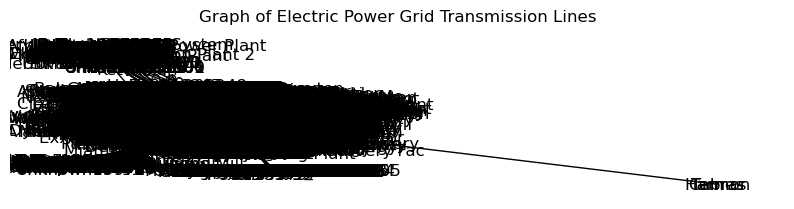

In [150]:
   
# Plot the graph
fig, ax = plt.subplots(figsize=(10, 10))
gdf_exploded.plot(ax=ax, color='gray', linewidth=0.5)
# for edge in G.edges(data=True):
#     if isinstance(edge[2]['geometry'], list):  # Handle MultiLineString
#         for line in edge[2]['geometry']:
#             x, y = line.xy
#             ax.plot(x, y, color='blue', linewidth=1, alpha=0.5)
#     else:
#         x, y = edge[2]['geometry'].xy
#         ax.plot(x, y, color='blue', linewidth=1, alpha=0.5)
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=0)
plt.title('Graph of Electric Power Grid Transmission Lines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [144]:
# len(G.edges)
list(G.edges)[0:1000:None]

[('UNKNOWN115865', 'TAP142941'),
 ('TAP142941', 'TAP170011'),
 ('TAP142941', 'TAP142940'),
 ('UNKNOWN109093', 'TAP142857'),
 ('UNKNOWN109093', 'TAP142853'),
 ('UNKNOWN109093', 'TAP168986'),
 ('TAP142857', 'SILVERHILL'),
 ('TAP142857', 'UNKNOWN150179'),
 ('UNKNOWN115051', 'TAP154872'),
 ('TAP154872', 'TAP154873'),
 ('TAP154872', 'TAP154871'),
 ('FORT PAYNE PRIMARY', 'TAP152965'),
 ('FORT PAYNE PRIMARY', 'HENAGAR'),
 ('FORT PAYNE PRIMARY', 'TAP152973'),
 ('FORT PAYNE PRIMARY', 'TAP155925'),
 ('FORT PAYNE PRIMARY', 'TAP149923'),
 ('FORT PAYNE PRIMARY', 'TAP149922'),
 ('TAP152965', 'TAP152971'),
 ('TAP152965', 'SYLVANIA'),
 ('UNKNOWN121903', 'TAP137923'),
 ('UNKNOWN121903', 'TAP137952'),
 ('TAP137923', 'UNKNOWN122310'),
 ('TAP137923', 'TAP137926'),
 ('CHAMBERLIN', 'JUNIPER'),
 ('CHAMBERLIN', 'TAP137177'),
 ('CHAMBERLIN', 'TWINSBURG'),
 ('CHAMBERLIN', 'UNKNOWN137174'),
 ('CHAMBERLIN', 'TAP137178'),
 ('CHAMBERLIN', 'UNKNOWN112784'),
 ('CHAMBERLIN', 'HIGHLAND'),
 ('JUNIPER', 'UNKNOWN113655'),

In [156]:

# Compute network diagnostics
degree = nx.degree(G)
degree_centrality = nx.degree_centrality(G)
# betweenness_centrality = nx.betweenness_centrality(G)

# # Visualize network graph
# plt.figure(figsize=(8, 6))
# nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=12)
# plt.title('Network Graph')
# plt.show()

# Plot degree centrality
plt.figure(figsize=(6, 4))
plt.bar(degree_centrality.keys(), degree_centrality.values())
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality')
plt.show()

# # Plot betweenness centrality
# plt.figure(figsize=(6, 4))
# plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
# plt.xlabel('Node')
# plt.ylabel('Betweenness Centrality')
# plt.title('Betweenness Centrality')
# plt.show()


KeyboardInterrupt: 

In [173]:
degree_hist = nx.degree_histogram(G) 
degree_hist = np.array(degree_hist, dtype=float)

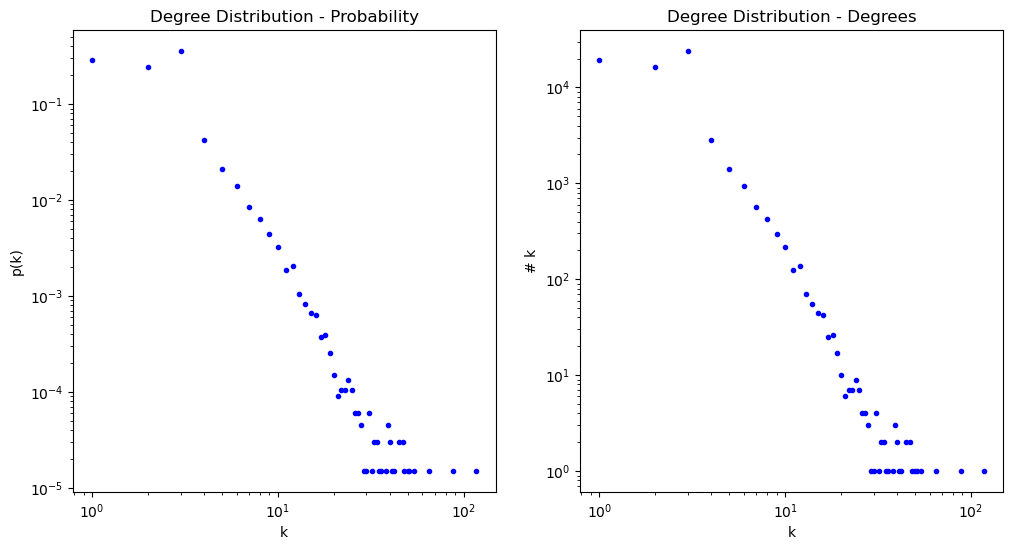

CPU times: user 1.07 s, sys: 138 ms, total: 1.21 s
Wall time: 721 ms


In [221]:
%%time

def plot_degree_dist(G):
    fig = plt.figure(figsize=(12,6))
    gs = gridspec.GridSpec(1, 2, )
    degree_hist = nx.degree_histogram(G) 
    degree_hist = np.array(degree_hist, dtype=float)
    degree_prob = degree_hist/G.number_of_nodes()
    
    ax = plt.subplot(gs[0])
    plt.plot(np.arange(degree_prob.shape[0]),degree_prob,'b.')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Degree Distribution - Probability')
    
    ax = plt.subplot(gs[1])
    plt.plot(np.arange(degree_hist.shape[0]),degree_hist,'b.')
    plt.xlabel('k')
    plt.ylabel('# k')
    plt.yscale('log')
    plt.xscale('log')
    plt.title('Degree Distribution - Degrees')
    
    plt.show()
    
plot_degree_dist(G)

In [222]:
sorted_degrees_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
sorted_degrees_nodes[0:100]

[('DEADHEAD', 117),
 ('MIDWAY', 88),
 ('NONE', 65),
 ('NORTHWEST', 54),
 ('FRANKLIN', 51),
 ('COLUMBIA', 50),
 ('MARION', 48),
 ('NORTHEAST', 47),
 ('TERMINAL', 47),
 ('VALLEY', 45),
 ('DEAD HEAD', 45),
 ('COTTONWOOD', 42),
 ('SOUTHWEST', 41),
 ('RIVERSIDE', 40),
 ('MADISON', 40),
 ('DAVIS', 39),
 ('WAYNE', 39),
 ('GOSHEN', 39),
 ('HIGHLAND', 38),
 ('TAP', 36),
 ('ANDERSON', 35),
 ('MIAMI', 34),
 ('JEFFERSON', 34),
 ('NELSON', 33),
 ('WILSON', 33),
 ('MONROE', 32),
 ('FAYETTEVILLE', 31),
 ('CHEROKEE', 31),
 ('CLINTON', 31),
 ('BENTON', 31),
 ('CLARK', 30),
 ('PARKER', 29),
 ('LEE', 28),
 ('SEMINOLE', 28),
 ('ALLEN', 28),
 ('MARTIN', 27),
 ('CLAY', 27),
 ('SUMMIT', 27),
 ('BELL', 27),
 ('ATHENS', 26),
 ('NEWARK', 26),
 ('JACKSON', 26),
 ('HAMILTON', 26),
 ('HOLBROOK', 25),
 ('MONTGOMERY', 25),
 ('SHELBY', 25),
 ('LEXINGTON', 25),
 ('FREEPORT', 25),
 ('WESTSIDE', 25),
 ('SWITCH', 25),
 ('CENTER', 24),
 ('SUNNYSIDE', 24),
 ('AIRPORT', 24),
 ('HARRISON', 24),
 ('LINCOLN', 24),
 ('WEST', 24

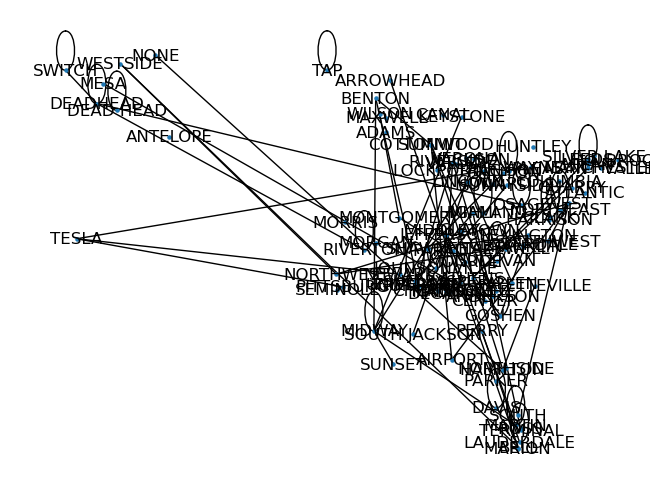

In [223]:
# Create a subgraph containing only the nodes with the specified titles
subgraph_nodes = [node[0] for node in sorted_degrees_nodes[0:100]]
H = G.subgraph(subgraph_nodes)

# Plot the subgraph
# pos = nx.spring_layout(H)  # Position the nodes using a spring layout
nx.draw(H,nx.get_node_attributes(G, 'pos'),with_labels=True,node_size=5)#, pos, with_labels=True, node_color='lightblue', node_size=100)
plt.show()




Sub1 TESLA to Sub2 LAWRENCE LIVERMORE LAB
length of this segment = 81614     18711.569782
83437     12719.465160
85246    102745.071206
86683    279301.950666
87121      4391.411058
87720     48774.167250
89187    214926.561599
89624     12745.769134
89648     84059.224454
90960     49306.517948
92267    128032.044240
92823     57755.688832
Name: SHAPE__Len, dtype: float64
Sub1 TESLA to Sub2 TRACY
length of this segment = 81614     18711.569782
83437     12719.465160
85246    102745.071206
86683    279301.950666
87121      4391.411058
87720     48774.167250
89187    214926.561599
89624     12745.769134
89648     84059.224454
90960     49306.517948
92267    128032.044240
92823     57755.688832
Name: SHAPE__Len, dtype: float64
Sub1 TESLA to Sub2 CROSS
length of this segment = 81614     18711.569782
83437     12719.465160
85246    102745.071206
86683    279301.950666
87121      4391.411058
87720     48774.167250
89187    214926.561599
89624     12745.769134
89648     84059.224454
90960   

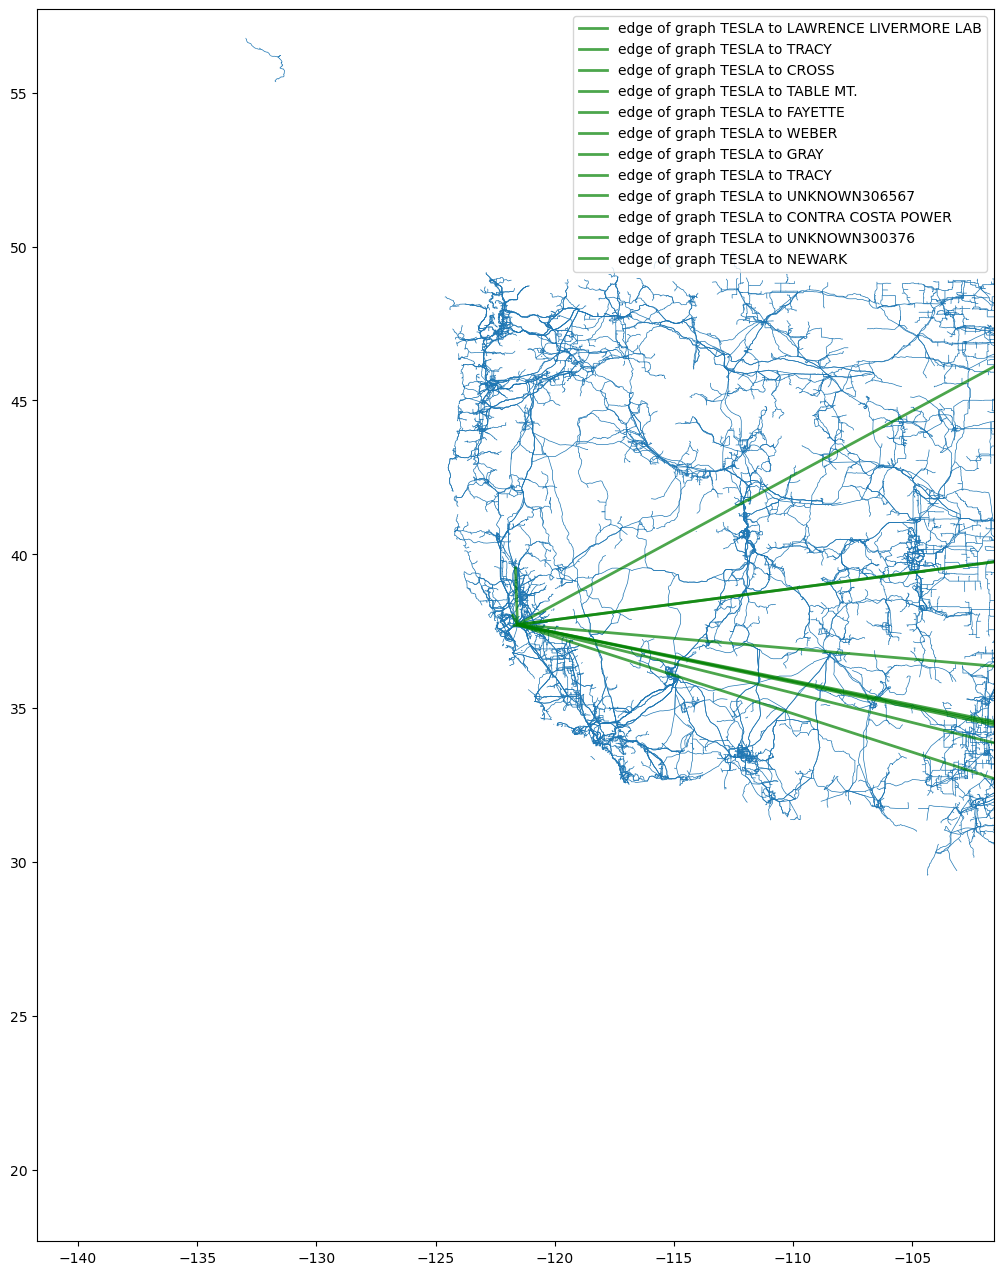

In [226]:
# examining oddities in the physical grid
sub_station = 'TESLA'
map = gdf.plot(figsize=(20, 16),linewidth=0.5)
overlay = gdf[gdf['SUB_1'].values==sub_station]

for o in range(len(overlay)):
    overlay_loop = overlay.iloc[o]
    print( 'Sub1 {} to Sub2 {}'.format(overlay_loop['SUB_1'],overlay_loop['SUB_2']))

    # Extract coordinates of the node desired
    edge_nodes = (overlay_loop['SUB_1'],overlay_loop['SUB_2'])
    edge_coordinates = [G.nodes[node]['pos'] for node in edge_nodes]
    edge_coordinates


    # Plot the edge on the basemap
    for i in range(len(edge_coordinates) - 1):
        start = edge_coordinates[i]
        end = edge_coordinates[i + 1]
        map.plot([start[0], end[0]], [start[1], end[1]], color='green', linewidth=2, alpha=0.7,label='edge of graph '+overlay_loop['SUB_1']+' to ' +overlay_loop['SUB_2'])

    
    if o==0:
        # Set xy axis limits
        bounds = overlay_loop.geometry.bounds
        # map.set_xlim((-130, -65))
        # map.set_ylim((25,50))
        map.set_xlim((bounds[0]-20.0, bounds[2]+20.0))
        map.set_ylim((bounds[1]-20.0, bounds[3]+20.0))

    print('length of this segment = {}'.format(overlay['SHAPE__Len']))


map.legend(loc='upper right')

In [210]:
print(overlay_loop.geometry.bounds)
bounds[1]-1.0, bounds[3]+1.0

(-89.593372, 38.004744, -89.574655, 38.071566)


(37.004744, 39.071566)

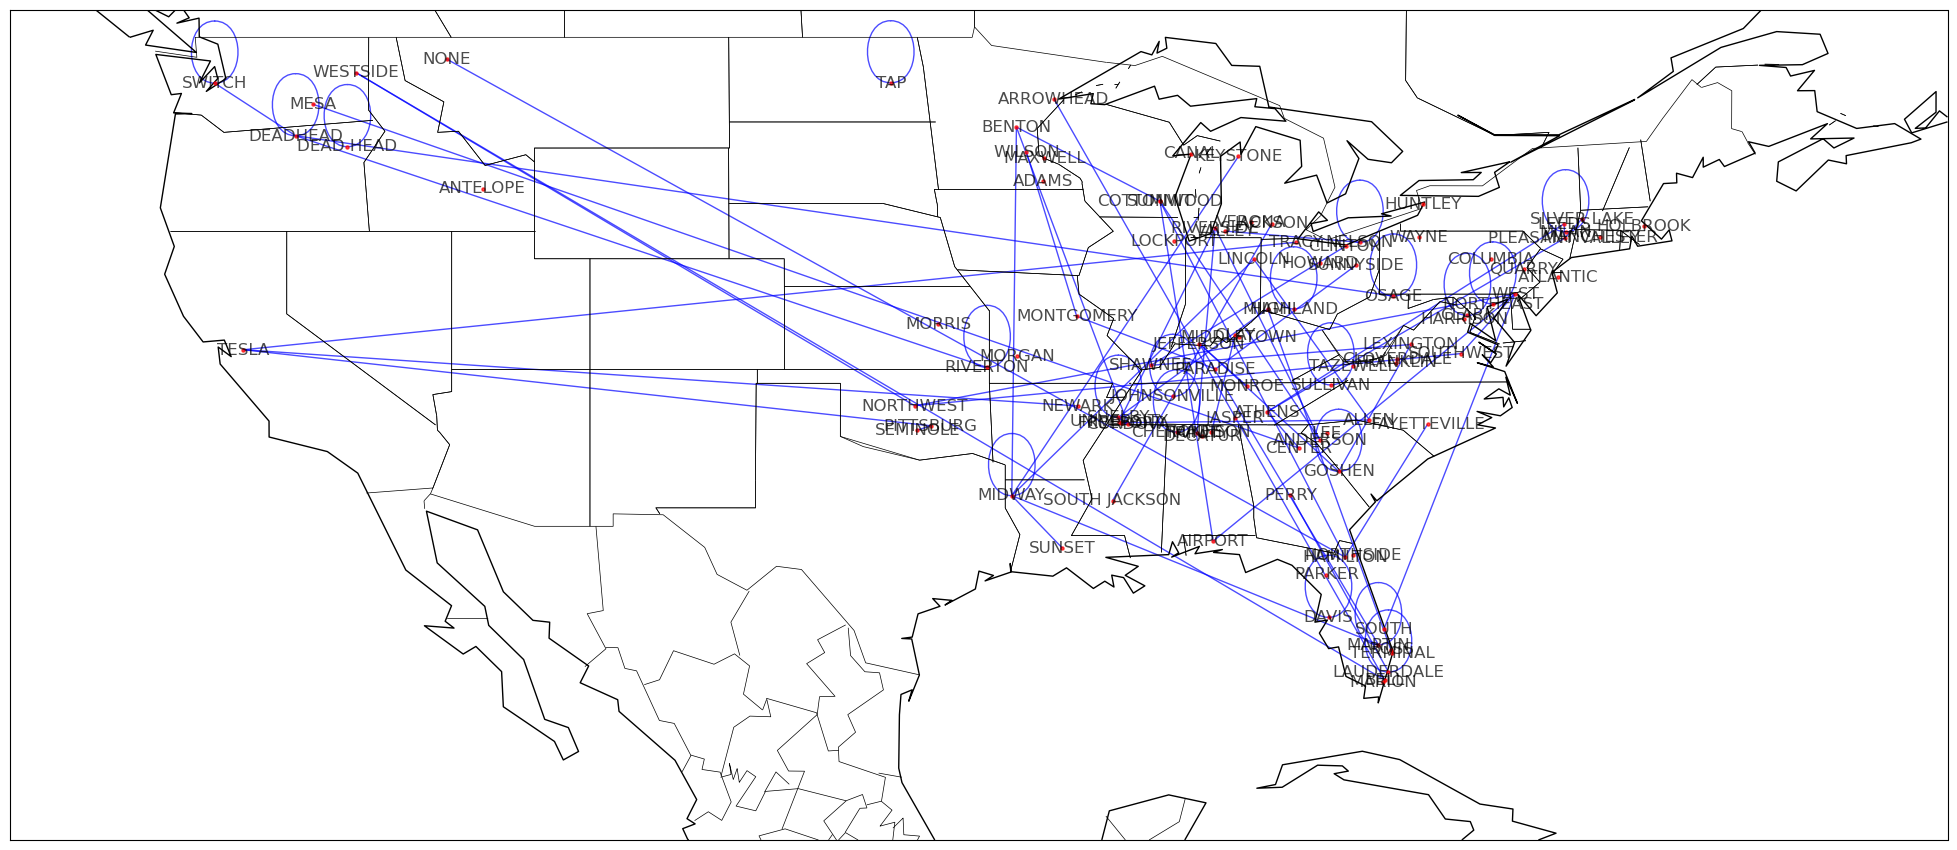

In [225]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


# Create a Basemap object
plt.figure(figsize=(25,25))
m = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50,
            epsg=4326, lat_1=33, lat_2=45, lon_0=-95)
# map = Basemap(llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15, resolution = 'h', epsg=5520)
# Plot the map
m.drawcoastlines()
m.drawcountries()
m.drawstates()


nx.draw_networkx(H, nx.get_node_attributes(H, 'pos'), node_size=5, node_color='r', edge_color = 'b', alpha=0.7,with_labels=True)


# # Plot the nodes
# # pos = {node: (lon, lat) for node, (lon, lat) in nx.get_node_attributes(H, 'pos').items()}
# nx.draw_networkx_nodes(H, nx.get_node_attributes(H, 'pos'), node_size=100, node_color='r', alpha=0.7)

# # Draw edges if needed
# nx.draw_networkx_edges(H, nx.get_node_attributes(H, 'pos'), width=1.0, alpha=0.5)

# Show the plot
plt.show()


In [164]:
# idx = 35000
idx = 50000


Sub1 TAP146680 to Sub2 TAP146819
length of this segment = 50000    5210.566088
Name: SHAPE__Len, dtype: float64


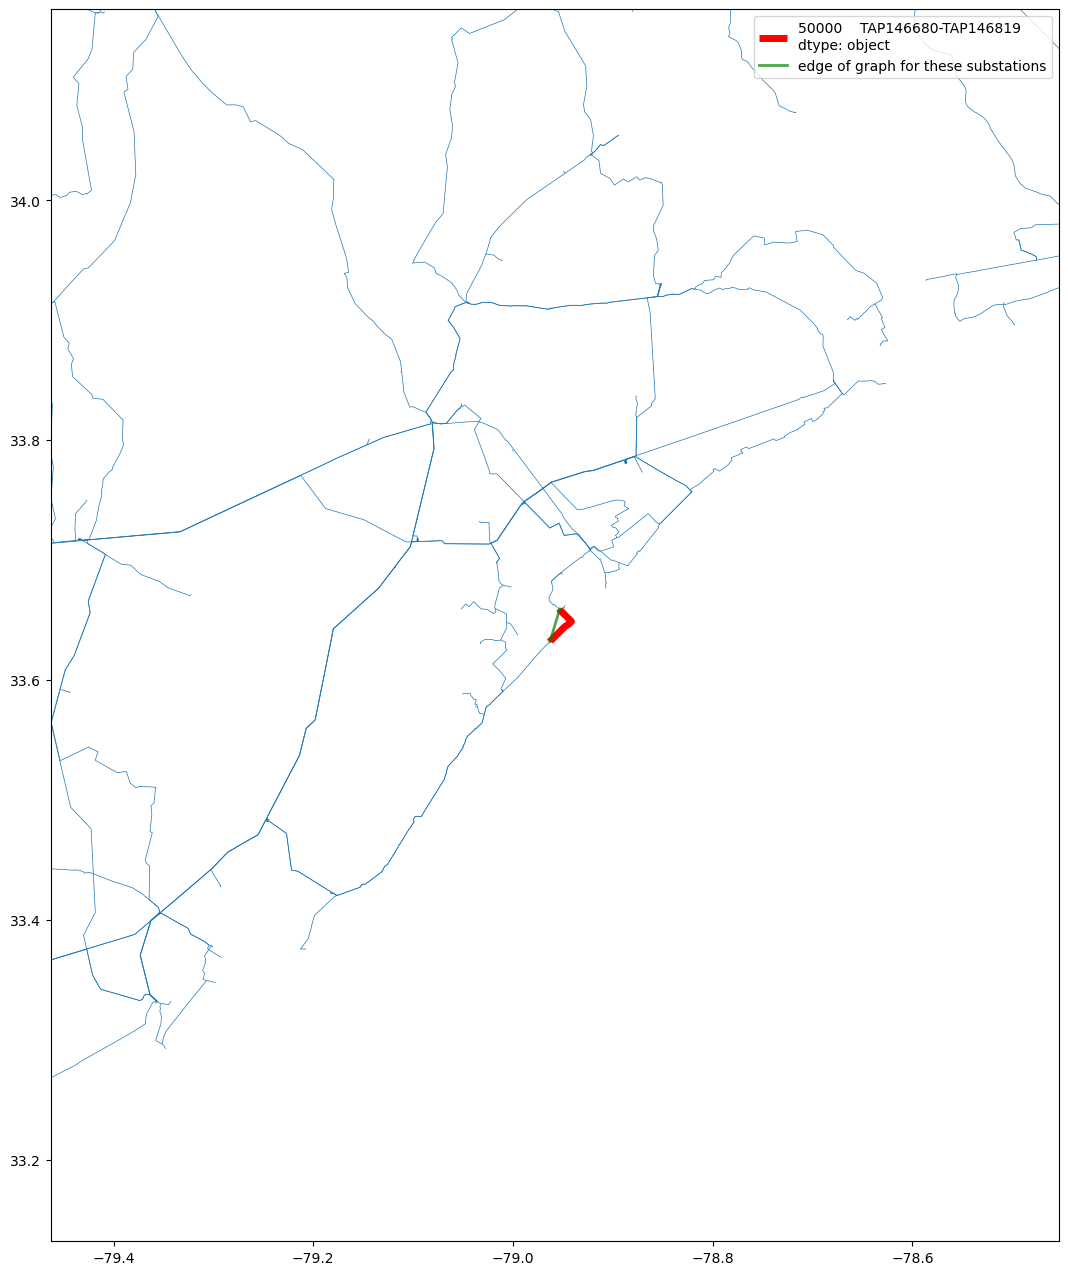

In [166]:
# plot graph on top of shapefile data (note idx defined above)

print( 'Sub1 {} to Sub2 {}'.format(gdf['SUB_1'].values[idx],gdf['SUB_2'].values[idx]))

# Extract coordinates of the node desired
edge_nodes = (gdf['SUB_1'].values[idx],gdf['SUB_2'].values[idx])
edge_coordinates = [G.nodes[node]['pos'] for node in edge_nodes]
edge_coordinates


map = gdf.plot(figsize=(20, 16),linewidth=0.5)
overlay = gdf.iloc[idx:idx+1]
overlay.plot(ax=map, marker='o', color='r',markersize=200, linewidth=5, label=overlay['SUB_1']+'-'+overlay['SUB_2'])

# Plot the edge on the basemap
for i in range(len(edge_coordinates) - 1):
    start = edge_coordinates[i]
    end = edge_coordinates[i + 1]
    map.plot([start[0], end[0]], [start[1], end[1]], color='green', linewidth=2, alpha=0.7,label='edge of graph for these substations')

    
# Set xy axis limits
bounds = overlay.geometry.boundary.explode(index_parts=True).unstack()
# map.set_xlim((-130, -65))
# map.set_ylim((25,50))
map.set_xlim((bounds[0].x.values[0]-0.5, bounds[1].x.values[0]+0.5))
map.set_ylim((bounds[0].y.values[0]-0.5, bounds[1].y.values[0]+0.5))

print('length of this segment = {}'.format(overlay['SHAPE__Len']))

map.legend(loc='upper right')




KeyboardInterrupt: 

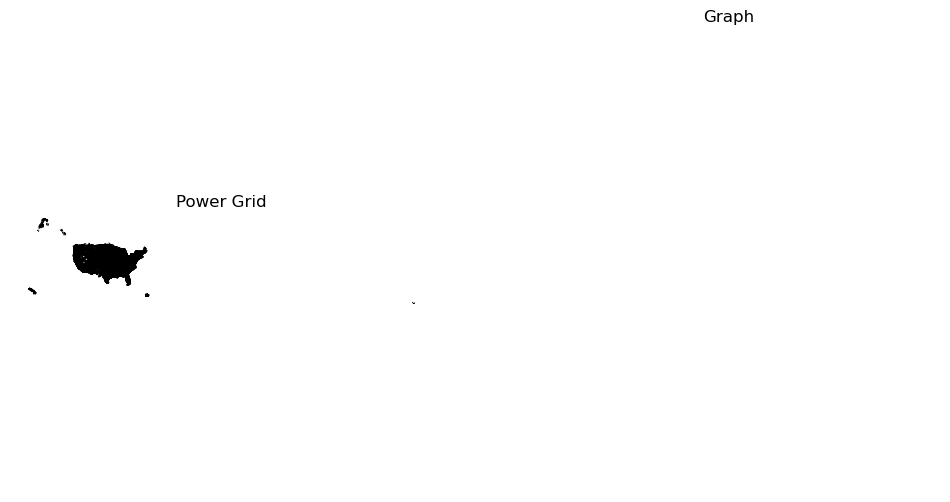

In [167]:
# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gdf_exploded.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Power Grid", "Graph")[i])
    facet.axis("off")
    try:  # For issues with downloading/parsing in CI
        add_basemap(facet)
    except:
        pass

    
nx.draw(
    
    G, ax=ax[1], node_size=50
)

In [135]:
gdf.iloc[idx]

FID                                                         37001
OBJECTID                                                    36960
ID                                                         124385
TYPE                                                NOT AVAILABLE
STATUS                                              NOT AVAILABLE
NAICS_CODE                                                 221121
NAICS_DESC           ELECTRIC BULK POWER TRANSMISSION AND CONTROL
SOURCE                   IMAGERY, OpenStreetMap, EIA 861, EIA 860
SOURCEDATE                                    2014-11-24T00:00:00
VAL_METHOD                                             UNVERIFIED
VAL_DATE                                      2019-03-25T00:00:00
OWNER                               PUBLIC SERVICE CO OF OKLAHOMA
VOLTAGE                                                      69.0
VOLT_CLASS                                              UNDER 100
INFERRED                                                        Y
SUB_1     

In [132]:
edge_coordinates

[(-95.82859025999994, 36.365010787000074),
 (-95.86457770399994, 36.170260323000036)]

In [175]:
counts_volt_class = []
for v in np.unique(gdf['VOLT_CLASS'].values):
    print(v)
    counts_volt_class.append(len(gdf[gdf['VOLT_CLASS']==v]))
percentages_volt_class = [ (c / len(gdf))*100 for c in counts_volt_class]
print(percentages_volt_class)

100-161
220-287
345
500
735 AND ABOVE
DC
NOT AVAILABLE
UNDER 100
[47.436241899255215, 7.69181166507249, 2.7319526690812173, 0.8565563639880921, 0.04943738110847207, 0.01182198243898245, 8.97395939686395, 32.24821864219158]


In [184]:
ctr = 0
for v in np.unique(gdf['VOLT_CLASS'].values):
    print('Voltage Class = {}; Percentage of Transmission Lines = {:.2F}%'.format(v,percentages_volt_class[ctr]))
    ctr += 1
    
    

Voltage Class = 100-161; Percentage of Transmission Lines = 47.44%
Voltage Class = 220-287; Percentage of Transmission Lines = 7.69%
Voltage Class = 345; Percentage of Transmission Lines = 2.73%
Voltage Class = 500; Percentage of Transmission Lines = 0.86%
Voltage Class = 735 AND ABOVE; Percentage of Transmission Lines = 0.05%
Voltage Class = DC; Percentage of Transmission Lines = 0.01%
Voltage Class = NOT AVAILABLE; Percentage of Transmission Lines = 8.97%
Voltage Class = UNDER 100; Percentage of Transmission Lines = 32.25%


In [51]:
import momepy

In [54]:
G2 = momepy.gdf_to_nx(gdf_exploded, approach="primal")

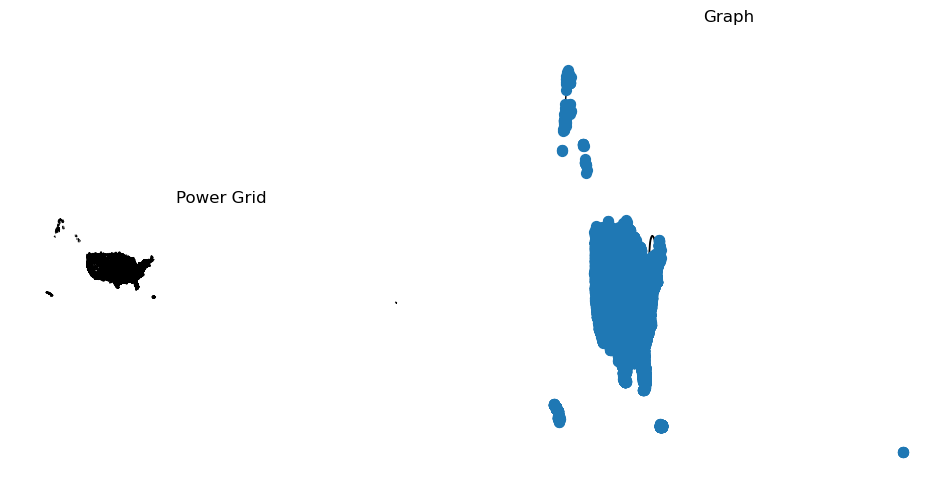

In [57]:
# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gdf_exploded.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Power Grid", "Graph")[i])
    facet.axis("off")
    try:  # For issues with downloading/parsing in CI
        add_basemap(facet)
    except:
        pass
nx.draw(
    
    G2, {n: [n[0], n[1]] for n in list(G2.nodes)}, ax=ax[1], node_size=50
)

In [59]:
degree_centrality = nx.degree_centrality(G2)


In [60]:
degree_centrality

{(-7895730.4795, 5242757.6214): 5.341880341880342e-05,
 (-7895714.4061, 5242835.5035): 4.0064102564102564e-05,
 (-9235201.9856, 4352619.8026): 0.0002403846153846154,
 (-9218131.4903, 4364200.3466): 0.00013354700854700856,
 (-8386149.9009, 5325598.7488): 4.0064102564102564e-05,
 (-8387310.7626, 5330863.8355): 4.0064102564102564e-05,
 (-10011772.0539, 3504713.3356): 0.0001201923076923077,
 (-10007333.6566, 3508553.5062): 5.341880341880342e-05,
 (-10081770.7547, 5103118.3995): 2.670940170940171e-05,
 (-10077702.0719, 5107877.9591): 4.0064102564102564e-05,
 (-9666110.1309, 4009360.6902): 2.670940170940171e-05,
 (-9664118.5386, 4013027.5595): 2.670940170940171e-05,
 (-7906450.8107, 5220314.3419): 2.670940170940171e-05,
 (-7904537.7479, 5221520.0717): 2.670940170940171e-05,
 (-8386153.6514, 5325530.8196): 8.012820512820513e-05,
 (-8419218.915, 5327527.8297): 9.348290598290598e-05,
 (-10078404.8134, 5132702.9909): 2.670940170940171e-05,
 (-10051637.6597, 5129723.4009): 5.341880341880342e-05,


In [63]:
degree = dict(nx.degree(G2))

In [64]:
degree

{(-7895730.4795, 5242757.6214): 4,
 (-7895714.4061, 5242835.5035): 3,
 (-9235201.9856, 4352619.8026): 18,
 (-9218131.4903, 4364200.3466): 10,
 (-8386149.9009, 5325598.7488): 3,
 (-8387310.7626, 5330863.8355): 3,
 (-10011772.0539, 3504713.3356): 9,
 (-10007333.6566, 3508553.5062): 4,
 (-10081770.7547, 5103118.3995): 2,
 (-10077702.0719, 5107877.9591): 3,
 (-9666110.1309, 4009360.6902): 2,
 (-9664118.5386, 4013027.5595): 2,
 (-7906450.8107, 5220314.3419): 2,
 (-7904537.7479, 5221520.0717): 2,
 (-8386153.6514, 5325530.8196): 6,
 (-8419218.915, 5327527.8297): 7,
 (-10078404.8134, 5132702.9909): 2,
 (-10051637.6597, 5129723.4009): 4,
 (-9104342.2828, 5072771.3863): 3,
 (-9104238.8455, 5072743.1775): 4,
 (-10026235.2198, 3709543.7457): 3,
 (-10033332.3913, 3707992.7712): 1,
 (-10517694.7216, 4740783.0263): 2,
 (-10517341.2376, 4740227.4002): 12,
 (-8971908.9966, 4065596.719): 3,
 (-8972178.3663, 4065538.3188): 1,
 (-10046315.4016, 3807983.3811): 1,
 (-10046364.856, 3811090.1743): 3,
 (-92540

In [71]:
len(degree_centrality.keys())

74881

In [69]:
gdf_exploded

OBJECTID_1  OBJECTID      ID          TYPE         STATUS NAICS_CODE  \
0     0           1         1  100511  AC; Overhead     In Service     221121   
1     0           2         2  140809  AC; Overhead     In Service     221121   
2     0           3         3  140837  AC; Overhead     In Service     221121   
3     0           4         4  140811  AC; Overhead     In Service     221121   
4     0           5         5  140813  AC; Overhead     In Service     221121   
...             ...       ...     ...           ...            ...        ...   
94211 0       94212     94212  313969  AC; Overhead     In Service     221121   
94212 0       94213     94213  313970  AC; Overhead     In Service     221121   
94213 0       94214     94214  202495  AC; Overhead  Not Available     221121   
94214 0       94215     94215  202496  AC; Overhead  Not Available     221121   
94215 0       94216     94216  166911  AC; Overhead  Not Available     221121   

                                           NAICS_DESC  \
0     0  Electric Bulk Power Transmission and Control   
1     0  Electric Bulk Power Transmission and Control   
2     0  Electric Bulk Power Transmission and Control   
3     0  Electric Bulk Power Transmission and Control   
4     0  Electric Bulk Power Transmission and Control   
...                                               ...   
94211 0  Electric Bulk Power Transmission and Control   
94212 0  Electric Bulk Power Transmission and Control   
94213 0  Electric Bulk Power Transmission and Control   
94214 0  Electric Bulk Power Transmission and Control   
94215 0  Electric Bulk Power Transmission and Control   

                                                    SOURCE  \
0     0                          Imagery, EIA 861, EIA 860   
1     0                                   Imagery, EIA 860   
2     0  Imagery, https://www9.nationalgridus.com/oasis...   
3     0                             Imagery, OpenStreetMap   
4     0                                   Imagery, EIA 860   
...                                                    ...   
94211 0                                            Imagery   
94212 0                                            Imagery   
94213 0                                            Imagery   
94214 0                                            Imagery   
94215 0                                            Imagery   

                  SOURCEDATE     VAL_METHOD             VAL_DATE  \
0     0  2016-11-08T00:00:00        Imagery  2017-03-27T00:00:00   
1     0  2014-04-16T00:00:00        Imagery  2017-02-15T00:00:00   
2     0  2015-06-16T00:00:00        Imagery  2019-03-05T00:00:00   
3     0  2014-06-20T00:00:00        Imagery  2017-03-20T00:00:00   
4     0  2016-10-04T00:00:00  Imagery/other  2018-05-09T00:00:00   
...                      ...            ...                  ...   
94211 0  2018-08-28T00:00:00  Imagery/other  2022-05-24T00:00:00   
94212 0  2018-10-16T00:00:00  Imagery/other  2022-05-24T00:00:00   
94213 0  2019-04-10T00:00:00        Imagery  2019-04-10T00:00:00   
94214 0  2019-04-10T00:00:00        Imagery  2019-04-10T00:00:00   
94215 0  2019-04-10T00:00:00        Imagery  2019-04-10T00:00:00   

                                                   OWNER  VOLTAGE VOLT_CLASS  \
0     0                                    Not Available    115.0    100-161   
1     0                               Kingsport Power Co    161.0    100-161   
2     0                       Niagara Mohawk Power Corp.    115.0    100-161   
3     0                         Entergy New Orleans, Llc    115.0    100-161   
4     0                            Midamerican Energy Co    161.0    100-161   
...                                                  ...      ...        ...   
94211 0      Sulphur Springs Valley Electric Cooperative     69.0  Under 100   
94212 0  Graham County Electric Cooperative Incorporated     69.0  Under 100   
94213 0                            City Of Gering - (Ne)    115.0    